# Import Packages/Libraries


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import requests
import matplotlib.pyplot as plt
from IPython.display import Image

# Build the CNN model

In [13]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(200, 200, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(1))
classifier.add(Activation('sigmoid'))

c:\Users\A.deWet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [14]:

classifier.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare the data


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    'Dataset/train/',
    target_size=(200, 200),
    batch_size=32,
    shuffle=True,
    class_mode="binary"
)

test_set = test_datagen.flow_from_directory(
    'Dataset/test/', 
    target_size=(200, 200),
    batch_size=32,
    shuffle=True,
    class_mode="binary"
)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Dataset/train/'

# Train the model

In [8]:
history = classifier.fit(
    training_set,
    steps_per_epoch=1000,
    epochs=25,
    validation_data=test_set,
    validation_steps=100
)

Epoch 1/25


c:\Users\A.deWet\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  10/1000 ━━━━━━━━━━━━━━━━━━━━ 6:49 414ms/step - accuracy: 0.5561 - loss: 0.7066

c:\Users\A.deWet\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5347 - loss: 0.7108 - val_accuracy: 0.5403 - val_loss: 0.6807
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6206 - loss: 0.6598 - val_accuracy: 0.6371 - val_loss: 0.6474
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5862 - loss: 0.6558 - val_accuracy: 0.5484 - val_loss: 0.6920
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5795 - loss: 0.6628 - val_accuracy: 0.6774 - val_loss: 0.6360
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6795 - loss: 0.6303 - val_accuracy: 0.6855 - val_loss: 0.6091
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7140 - loss: 0.6052 - val_accuracy: 0.6935 - val_loss: 0.5971
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7172 - loss: 0.5790 - val_accuracy: 0.6855 - val_loss: 0.5690
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6759 - loss: 0.5829 - val_accura

In [9]:
# Plot training and validation accuracy/loss

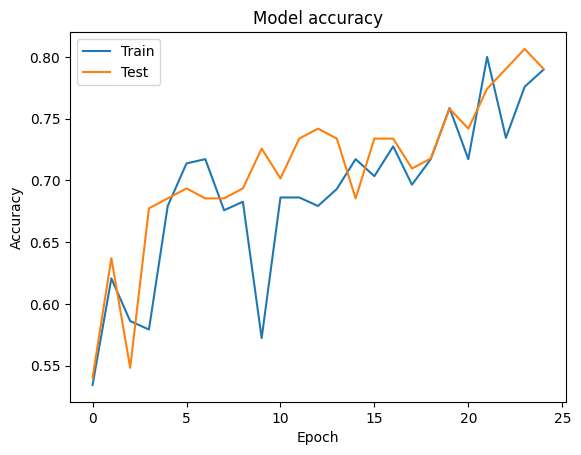

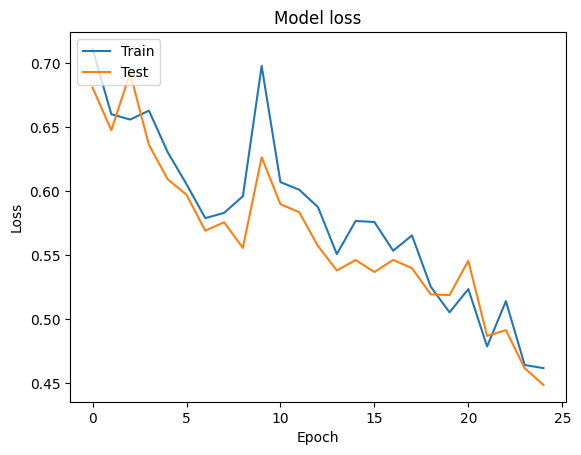

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Making predictions 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
This is Nicolas Cage:


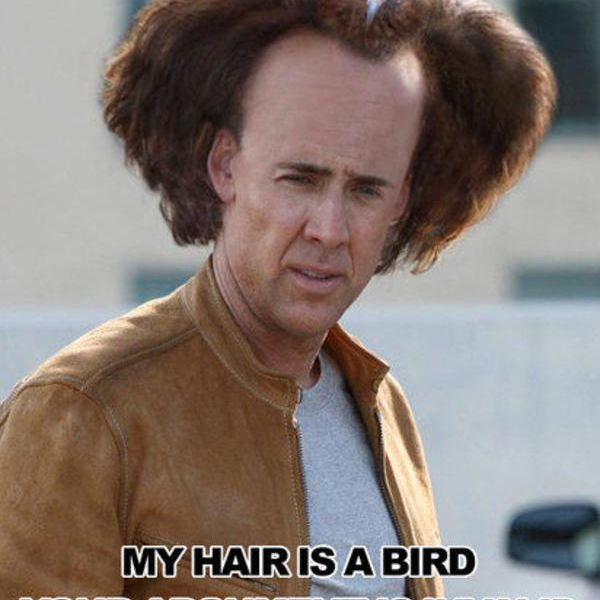

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This is not Nicolas Cage:


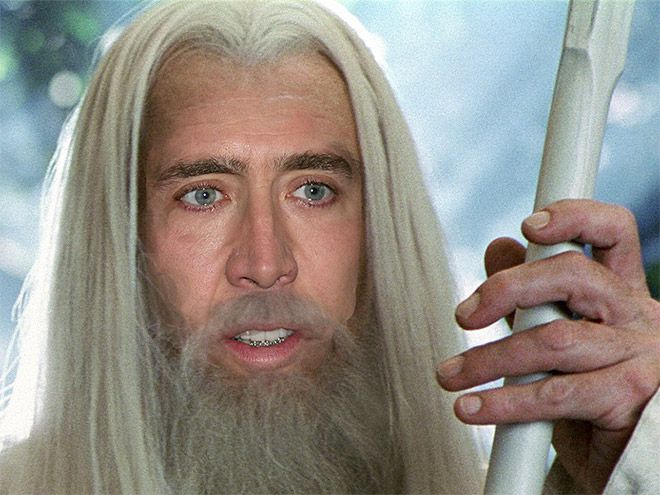

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
This is not Nicolas Cage:


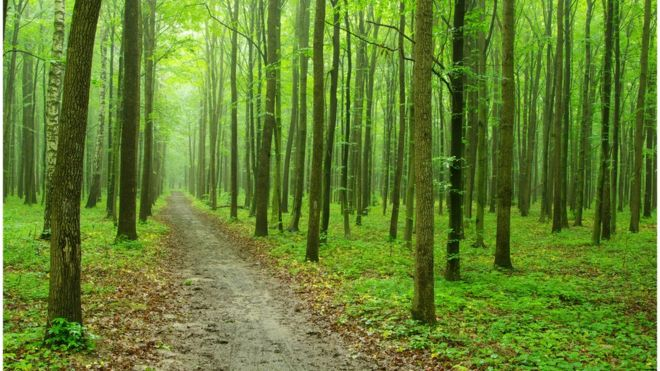

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
This is not Nicolas Cage:


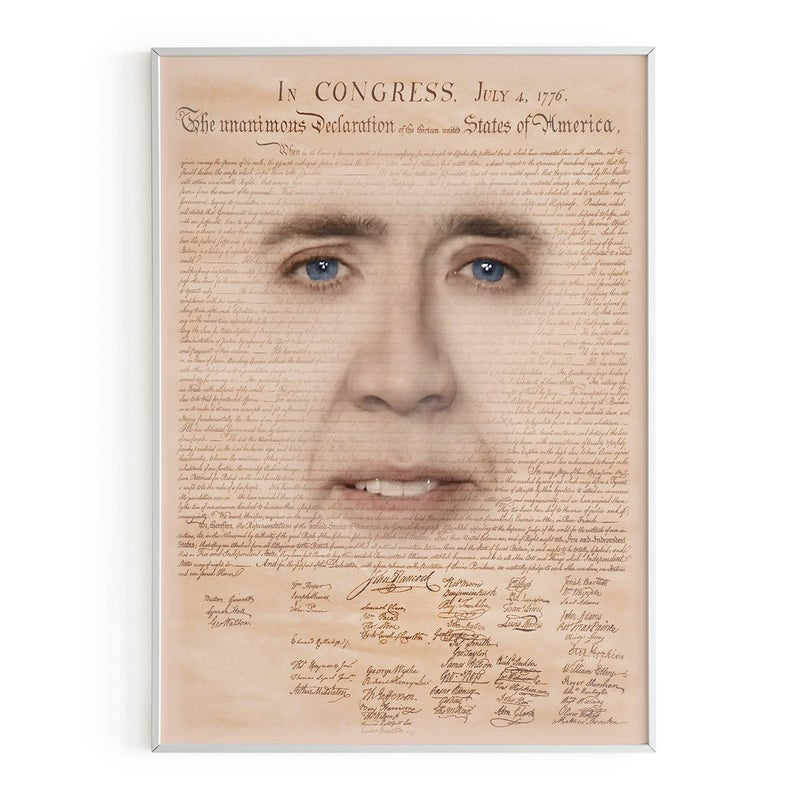

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This is Nicolas Cage:


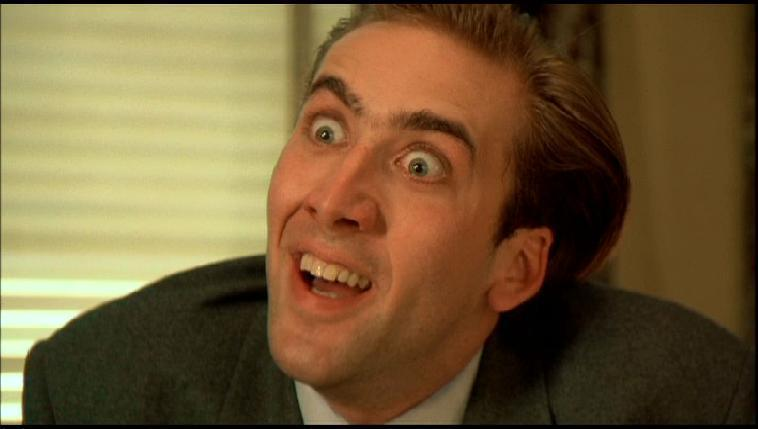

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
This is Nicolas Cage:


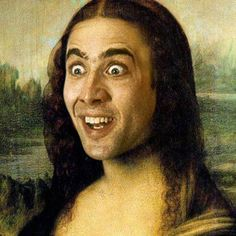

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
This is not Nicolas Cage:


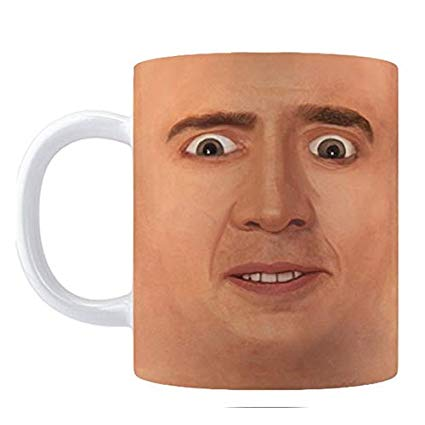

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
This is Nicolas Cage:


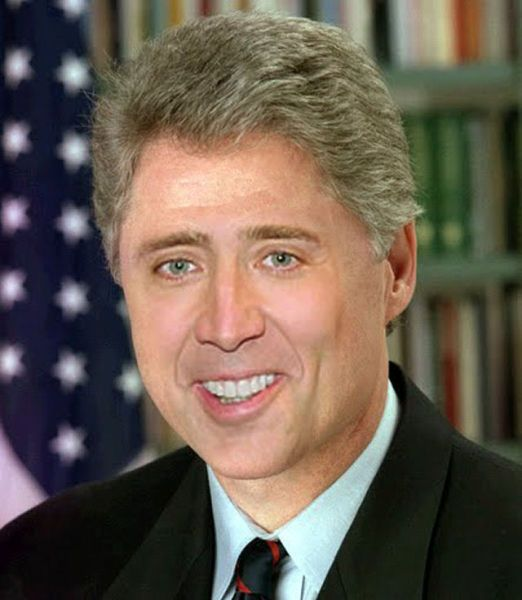

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
This is not Nicolas Cage:


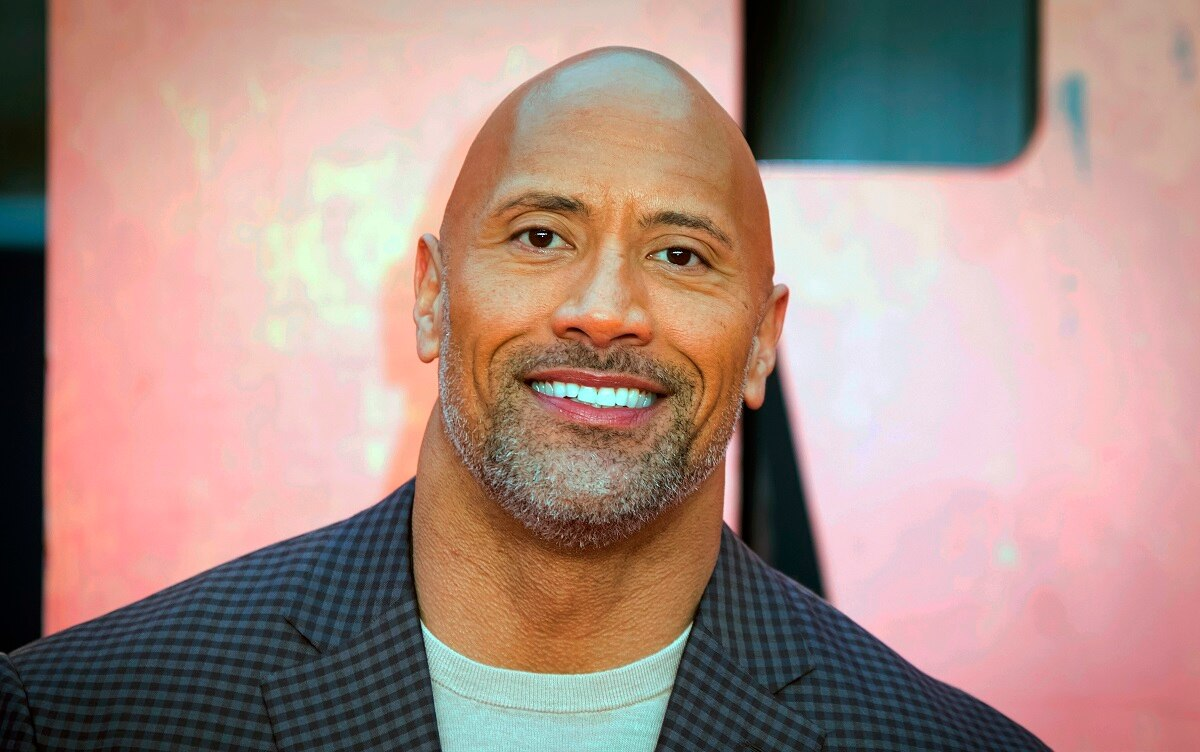

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This is not Nicolas Cage:


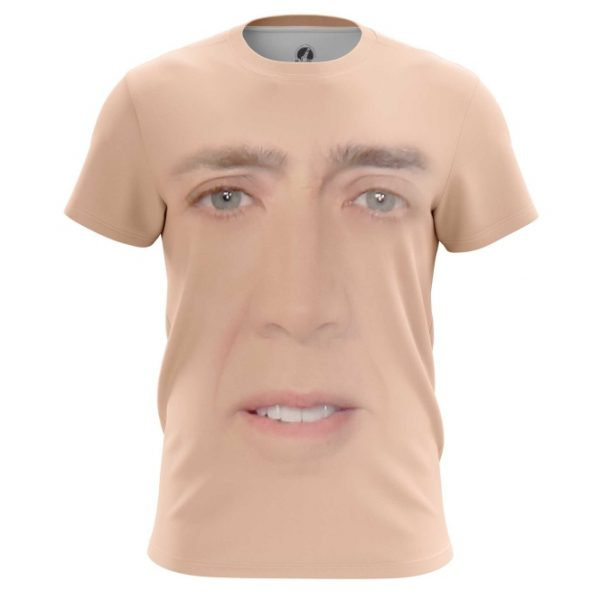

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This is not Nicolas Cage:


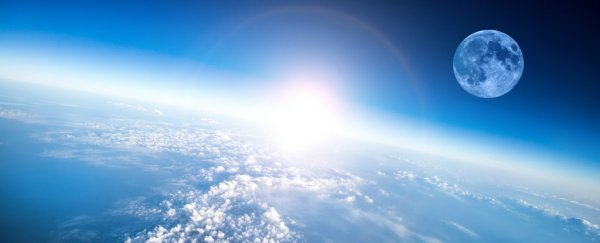

In [11]:
predict_path = 'Predict'

for file in os.listdir(predict_path):
    if not file.startswith('.'):  # Avoid hidden files
        file_path = os.path.join(predict_path, file)
        
        test_image = image.load_img(file_path, target_size=(200, 200))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis=0)
        
        result = classifier.predict(test_image)
        if result[0][0] == 1:
            prediction = 'This is Nicolas Cage:'
        else:
            prediction = 'This is not Nicolas Cage:'
        
        print(prediction)
        img = Image(file_path, width="400", height="400")
        display(img)